In [112]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import PercentFormatter



# Load and clean dataset
* Load the dataset
* Replace missing values and invalid entries in columns if any
* Drop duplicates if any 
* Drop columns not needed for analysis
* convert date column to datetime format

In [89]:
# load the dataset
la_crime_data = pd.read_csv('crime_in_la.csv')
la_crime_data.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
0,190326475,01/03/2020,21:30,7,Wilshire,784,510,VEHICLE - STOLEN,0,0,M,O,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,08/02/2020,18:00,1,Central,182,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,04/11/2020,17:00,3,Southwest,356,480,BIKE - STOLEN,0344 1251,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1400 W 37TH ST,34.0210,-118.3002
3,200907217,10/03/2020,20:37,9,Van Nuys,964,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,CLOTHING STORE,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,17/08/2020,12:00,6,Hollywood,666,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1900 TRANSIENT,34.0944,-118.3277


In [90]:
# get dataset information
la_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963006 entries, 0 to 963005
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           963006 non-null  int64  
 1   DATE OCC        963006 non-null  object 
 2   TIME OCC        963006 non-null  object 
 3   AREA            963006 non-null  int64  
 4   AREA NAME       963006 non-null  object 
 5   Rpt Dist No     963006 non-null  int64  
 6   Crm Cd          963006 non-null  int64  
 7   Crm Cd Desc     963006 non-null  object 
 8   Mocodes         963006 non-null  object 
 9   Vict Age        963006 non-null  int64  
 10  Vict Sex        963006 non-null  object 
 11  Vict Descent    963006 non-null  object 
 12  Premis Desc     962431 non-null  object 
 13  Weapon Used Cd  963006 non-null  float64
 14  Weapon Desc     963006 non-null  object 
 15  Status          963005 non-null  object 
 16  Status Desc     963006 non-null  object 
 17  LOCATION  

In [91]:
# check for missing values
la_crime_data.isnull().sum()

DR_NO               0
DATE OCC            0
TIME OCC            0
AREA                0
AREA NAME           0
Rpt Dist No         0
Crm Cd              0
Crm Cd Desc         0
Mocodes             0
Vict Age            0
Vict Sex            0
Vict Descent        0
Premis Desc       575
Weapon Used Cd      0
Weapon Desc         0
Status              1
Status Desc         0
LOCATION            0
LAT                 0
LON                 0
dtype: int64

In [92]:
# replace missing values in 'Premis Desc' and 'status'
la_crime_data['Premis Desc'] = la_crime_data['Premis Desc'].fillna('Unknown')

mode_value_status = la_crime_data['Status'].mode()[0]
la_crime_data['Status'] = la_crime_data['Status'].fillna(mode_value_status)
la_crime_data.isnull().sum()


DR_NO             0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
LOCATION          0
LAT               0
LON               0
dtype: int64

In [93]:
# Replace invalid entries in 'Vict Sex' with 'X'
la_crime_data['Vict Sex'] = la_crime_data['Vict Sex'].replace({'-': 'X', 'H': 'X'})
la_crime_data['Vict Sex'].unique()

# Replace invalid entries in 'Vict Descent' with 'X'
la_crime_data['Vict Descent'] = la_crime_data['Vict Descent'].replace({'-': 'X'})

In [94]:
# check for duplicates
la_crime_data.duplicated().sum()

0

In [95]:
# Drop columns not needed for analysis
la_crime_data.drop(columns=['Mocodes'], inplace=True)

In [96]:
# Convert 'TIME OCC' to datetime format
time_str = la_crime_data['TIME OCC'].astype(str).str.zfill(4)  # Ensures all times are 4 digits
la_crime_data['TIME OCC'] = pd.to_datetime(time_str.str[:2] + time_str.str[2:], format='%H:%M')

# convert 'DATE OCC' to datetime format
la_crime_data['DATE OCC'] = pd.to_datetime(la_crime_data['DATE OCC'], format='%d/%m/%Y', errors='coerce')
la_crime_data[['DATE OCC', 'TIME OCC']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963006 entries, 0 to 963005
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   DATE OCC  963006 non-null  datetime64[ns]
 1   TIME OCC  963006 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 14.7 MB


# Area Summary
* Create a summary DataFrame showing the the total number of crimes, average victim age, most common location and most common crime by area.
* Visualize the total crimes and the average victim age by area
* Top/Bottom crimes
    * Get the top and bottom 5 crimes then visualize
* Crime Resolution
    * Resolution status: Calculate the resolution rates of crimes per area and visualize
    * Comparison by crime type: Identify which crime types have the highest/lowest resolution rates and visualize
    * District area performance: Create a DataFrame ranking districts by resolution rate, alongside total crime counts.

In [97]:
# Total number of crimes by area
total_crimes_by_area = la_crime_data.groupby('AREA NAME')['DR_NO'].nunique()

# Average victim age by area
average_victim_age_by_area = la_crime_data.groupby('AREA NAME')['Vict Age'].mean()

# most common location by area
most_common_location = la_crime_data.groupby('AREA NAME')['LOCATION'].apply(lambda x: x.mode()[0])

# Most common crime by area
most_common_crime = la_crime_data.groupby('AREA NAME')['Crm Cd Desc'].apply(lambda x: x.mode()[0])


# Create a summary DataFrame
area_summary = pd.DataFrame({
    'Total Crimes': total_crimes_by_area,
    'Average Victim Age': average_victim_age_by_area,
    'Most Common Location': most_common_location,
    'Most Common Crime': most_common_crime
})

area_summary

,Total Crimes,Average Victim Age,Most Common Location,Most Common Crime
AREA NAME,,,,
77th Street,60075,29.082663,5800 S VERMONT AV,VEHICLE - STOLEN
Central,65721,29.019491,800 N ALAMEDA ST,BURGLARY FROM VEHICLE
Devonshire,39936,30.161884,9300 TAMPA AV,VEHICLE - STOLEN
Foothill,32033,30.252302,9700 LAUREL CANYON BL,VEHICLE - STOLEN
Harbor,39747,27.622361,19500 NORMANDIE AV,VEHICLE - STOLEN
Hollenbeck,35412,26.152491,3400 WHITTIER BL,VEHICLE - STOLEN
Hollywood,50404,28.564043,HOLLYWOOD,BATTERY - SIMPLE ASSAULT
Mission,38554,29.548452,7800 VAN NUYS BL,VEHICLE - STOLEN
N Hollywood,48967,28.843589,5300 LANKERSHIM BL,VEHICLE - STOLEN


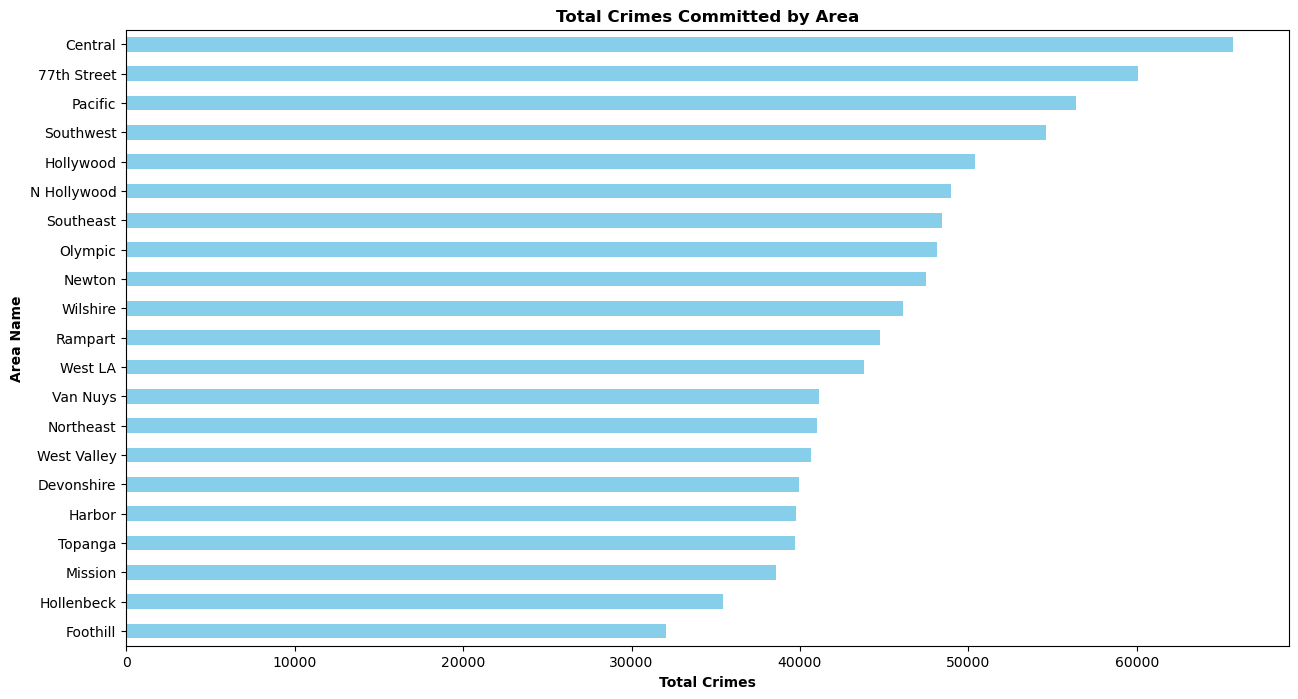

In [99]:
# Visualize the total crimes committed by area
plt.figure(figsize=(15, 8))
area_summary['Total Crimes'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Crimes Committed by Area', fontweight='bold')
plt.xlabel('Total Crimes', fontweight='bold')
plt.ylabel('Area Name', fontweight='bold')
plt.show()


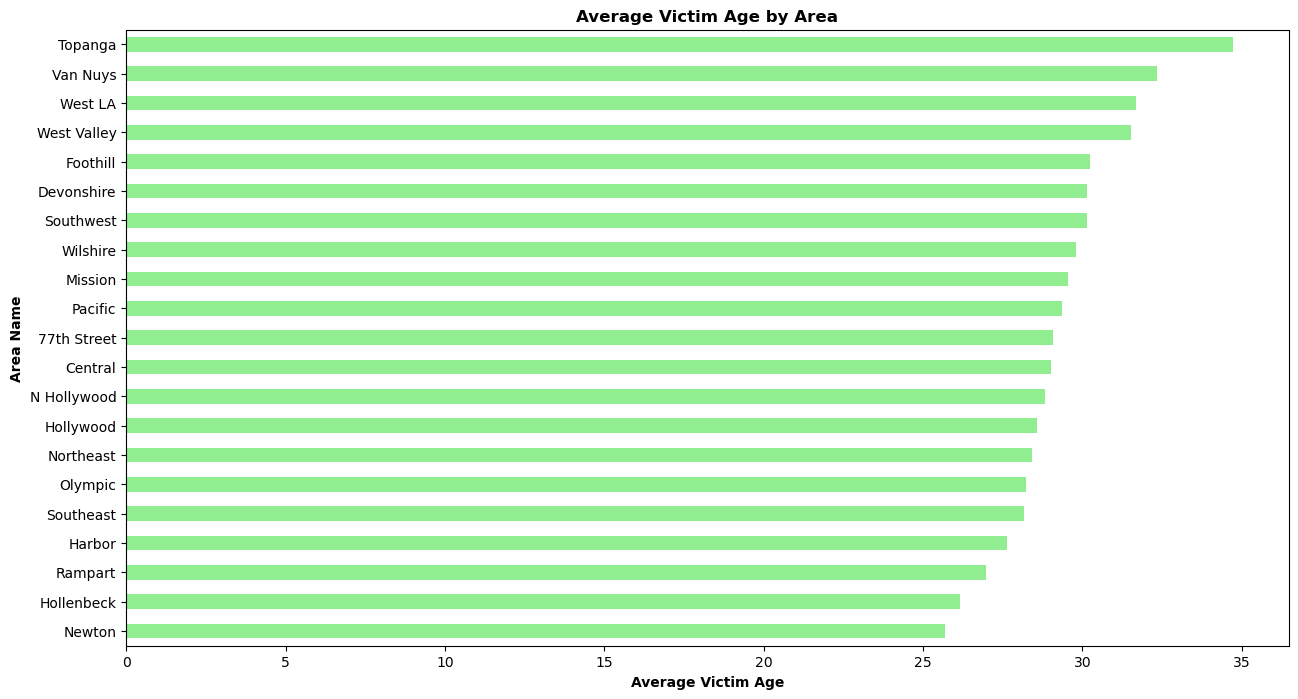

In [100]:
# Visualize the average victim age by area
plt.figure(figsize=(15, 8))
area_summary['Average Victim Age'].sort_values().plot(kind='barh', color='lightgreen')
plt.title('Average Victim Age by Area', fontweight='bold')
plt.xlabel('Average Victim Age', fontweight='bold')
plt.ylabel('Area Name', fontweight='bold')
plt.show()

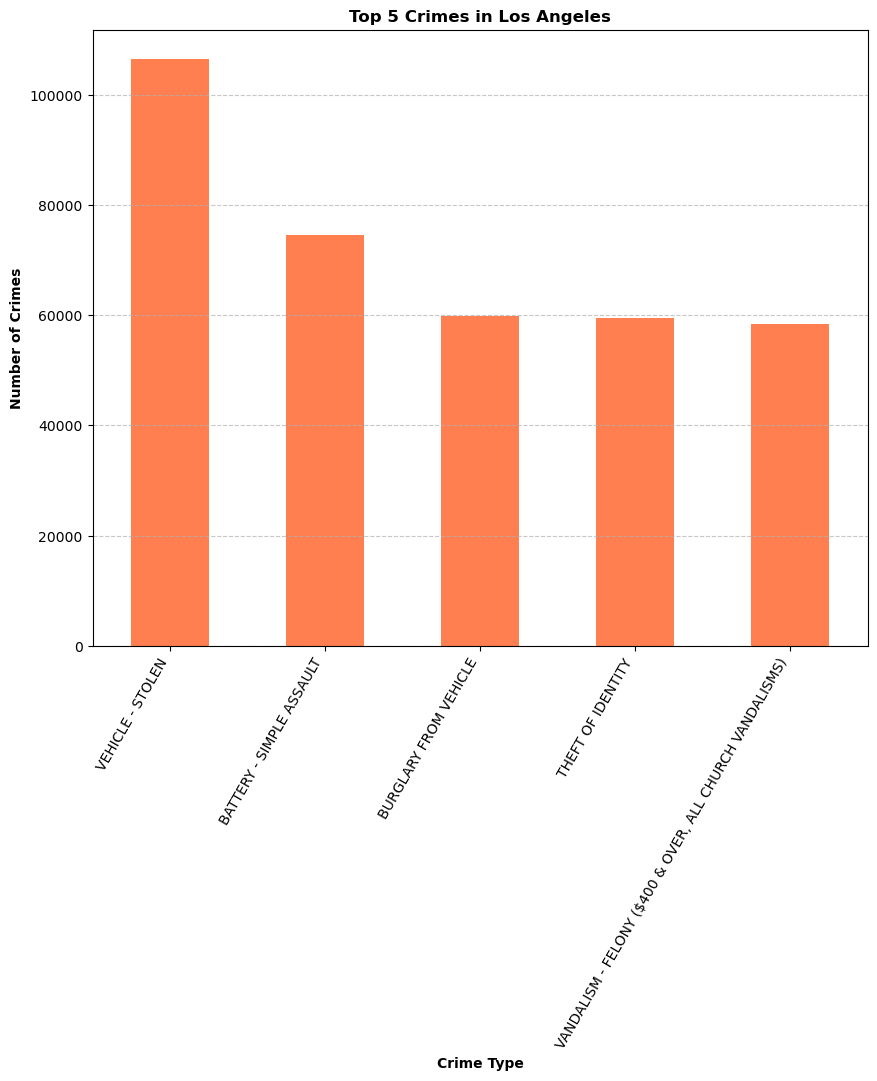

In [101]:
# Get the top 5 crimes
top_5_crimes = (la_crime_data['Crm Cd Desc'].value_counts()).nlargest(5)


# Visualize the top 5 crimes
plt.figure(figsize=(10, 8))
top_5_crimes.plot(kind='bar', color='coral')    
plt.title('Top 5 Crimes in Los Angeles', fontweight='bold')
plt.xlabel('Crime Type', fontweight='bold')
plt.ylabel('Number of Crimes', fontweight='bold')
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



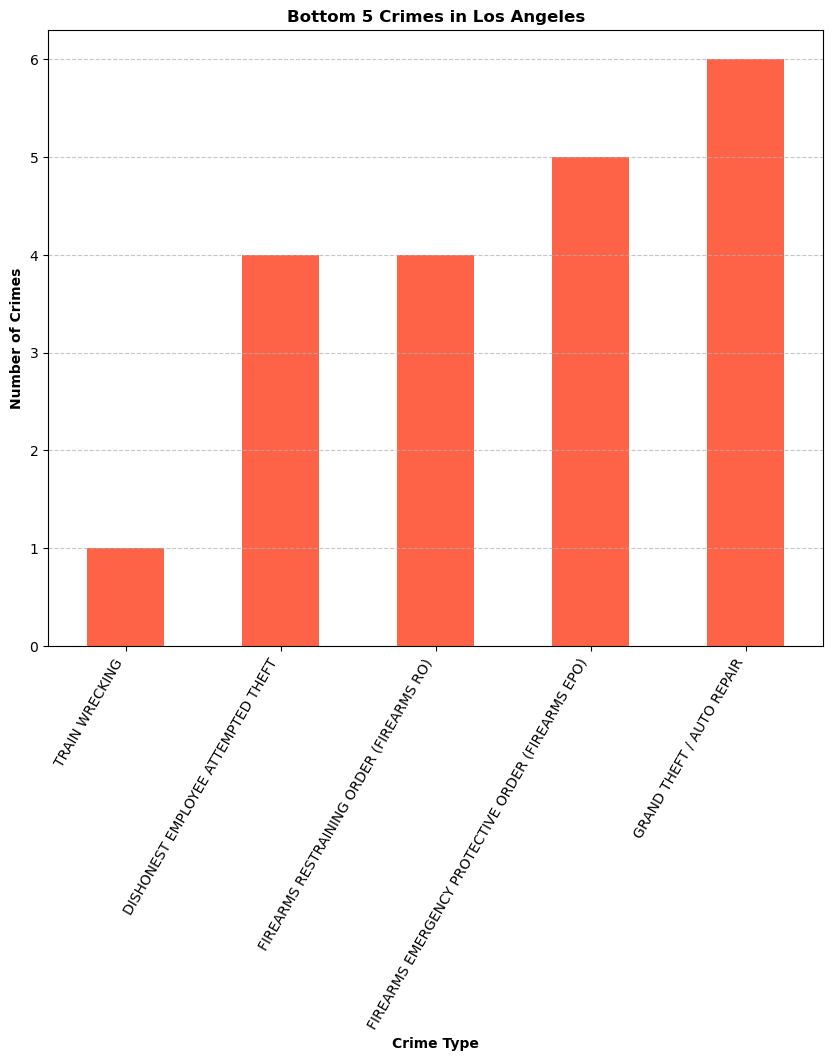

In [102]:
# Get the bottom 5 crimes
bottom_5_crimes = la_crime_data['Crm Cd Desc'].value_counts().nsmallest(5)

# Visualize
plt.figure(figsize=(10, 8))
bottom_5_crimes.plot(kind='bar', color='tomato')    
plt.title('Bottom 5 Crimes in Los Angeles', fontweight='bold')
plt.xlabel('Crime Type', fontweight='bold')
plt.ylabel('Number of Crimes', fontweight='bold')
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


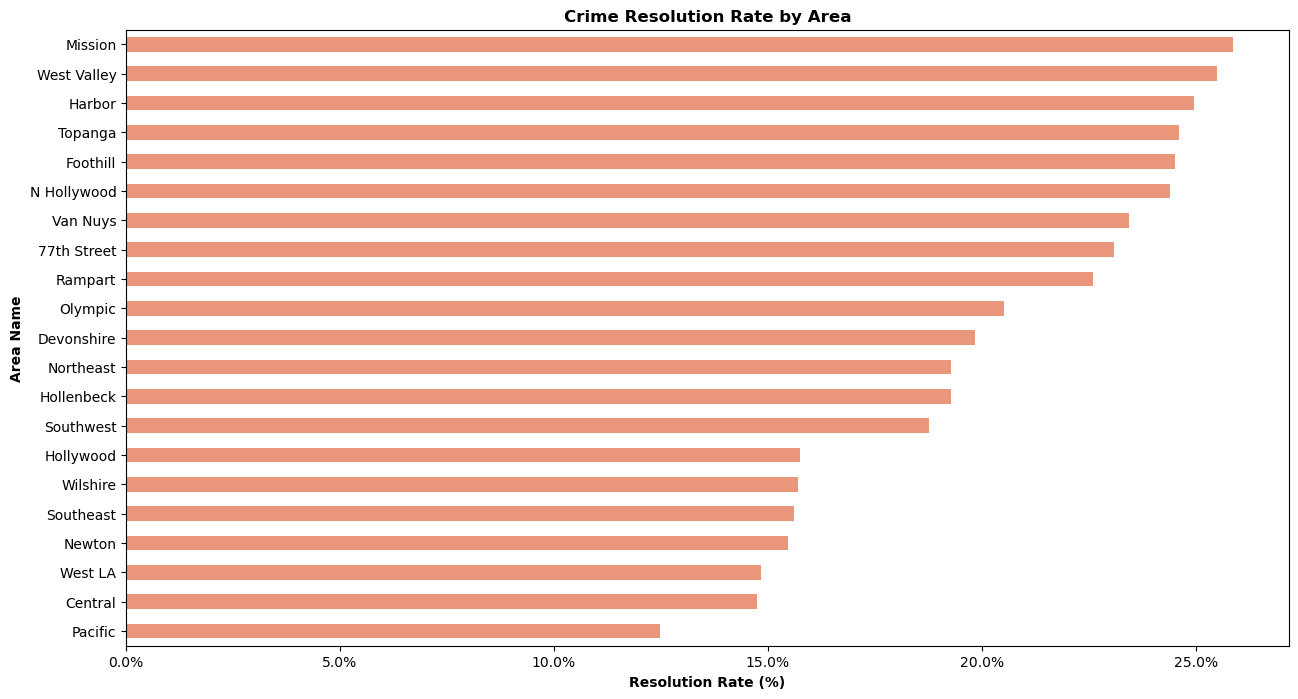

In [114]:
# Get the no of resolved crimes
resolved = ['Adult Arrest', 'Juvenile Arrest', 'Adult Other', 'Juvenile Other']
resolved_crimes = la_crime_data[la_crime_data['Status Desc'].isin(resolved)]
resolved_crime_counts = resolved_crimes.groupby('AREA NAME')['DR_NO'].nunique()

# Calculate resolution rate
resolution_rate = round((resolved_crime_counts / total_crimes_by_area) * 100, 2)

# Viualize resolution rate
plt.figure(figsize=(15, 8))
resolution_rate.sort_values().plot(kind='barh', color='darksalmon')
plt.title('Crime Resolution Rate by Area', fontweight='bold')   
plt.xlabel('Resolution Rate (%)', fontweight='bold')
plt.ylabel('Area Name', fontweight='bold')
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.show()


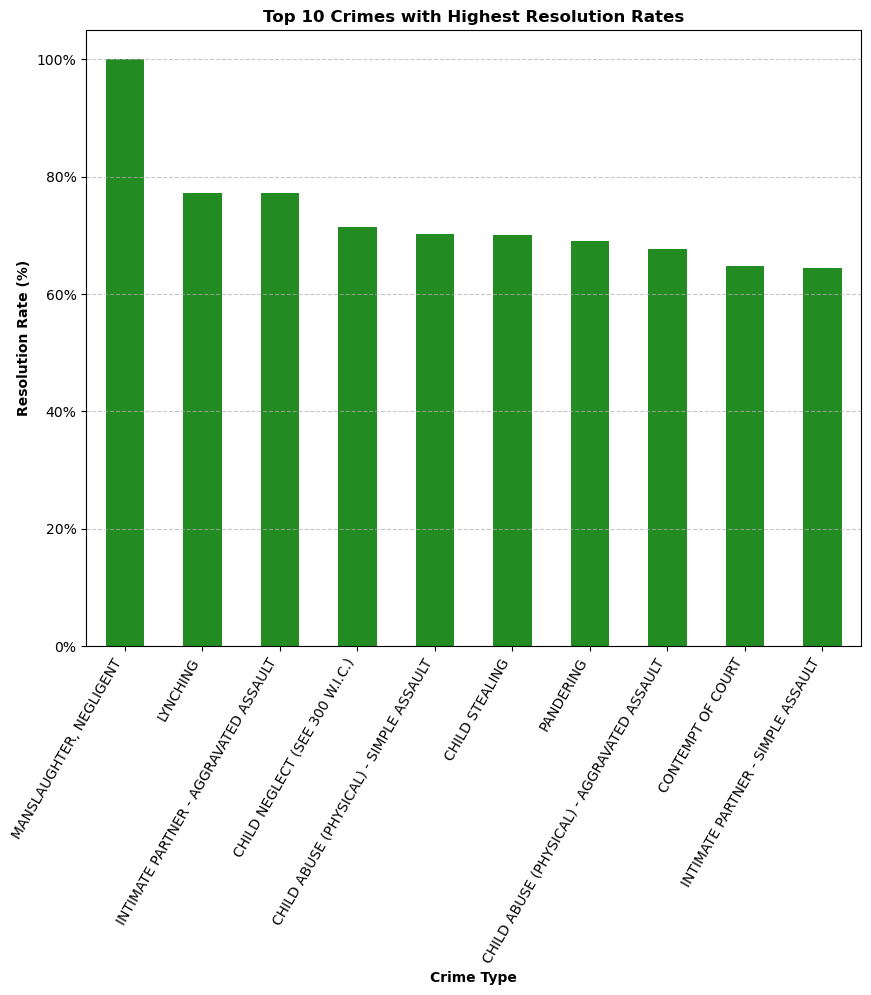

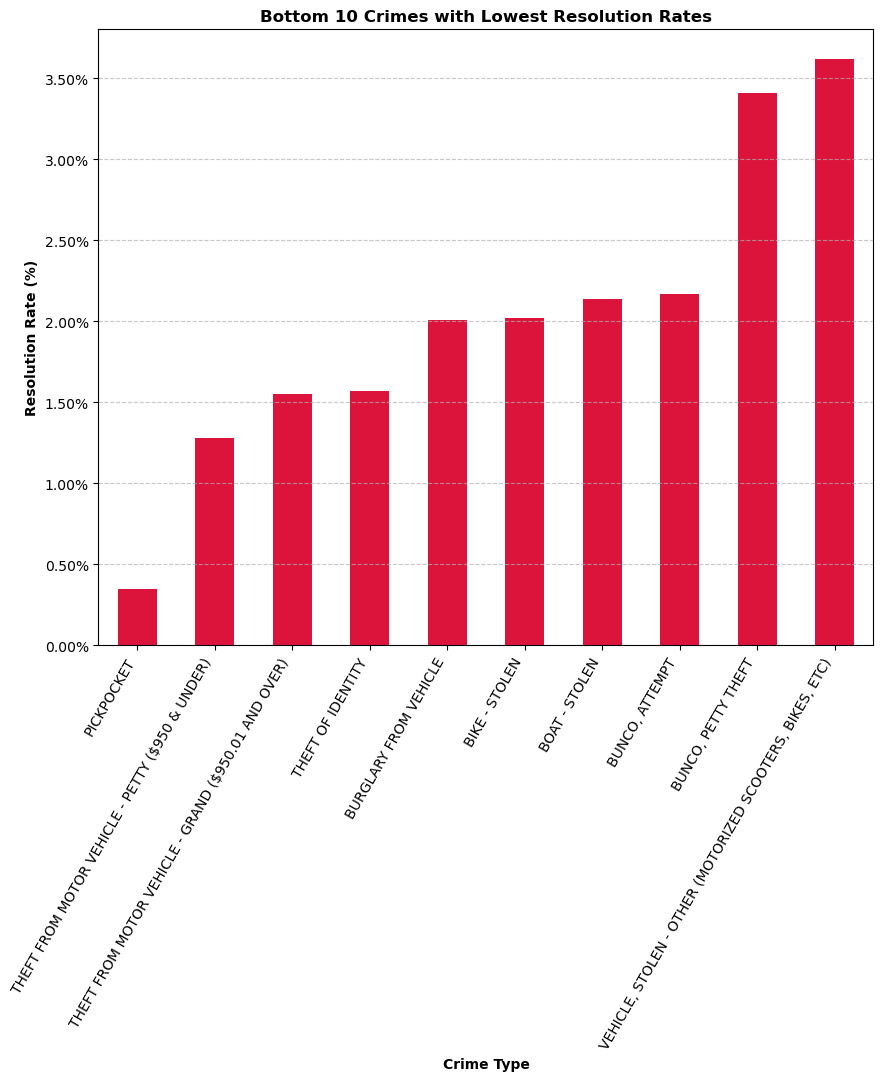

In [117]:
# Comparison by crime type
crime_resolution = resolved_crimes.groupby('Crm Cd Desc')['DR_NO'].nunique()
crime_count_type = la_crime_data.groupby('Crm Cd Desc')['DR_NO'].nunique()
crime_resolution_rate = round((crime_resolution / crime_count_type) * 100, 2)

# Get top 10 crimes with highest resolution rates
top_10_crimes = crime_resolution_rate.nlargest(10)

# Visualize top 10 crimes with highest resolution rates
plt.figure(figsize=(10, 8))
top_10_crimes.plot(kind='bar', color='forestgreen')
plt.title('Top 10 Crimes with Highest Resolution Rates', fontweight='bold')
plt.xlabel('Crime Type', fontweight='bold')
plt.ylabel('Resolution Rate (%)', fontweight='bold')
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.show()

# Get bottom 10 crimes with lowest resolution rates
bottom_10_crimes = crime_resolution_rate.nsmallest(10)

# Visualize bottom 10 crimes with lowest resolution rates
plt.figure(figsize=(10, 8))
bottom_10_crimes.plot(kind='bar', color='crimson')
plt.title('Bottom 10 Crimes with Lowest Resolution Rates', fontweight='bold')
plt.xlabel('Crime Type', fontweight='bold')
plt.ylabel('Resolution Rate (%)', fontweight='bold')
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.show()

In [105]:
# Summary DataFrame for crime resolution
crime_resolution_summary = pd.DataFrame({
    'Total Crimes': total_crimes_by_area,
    'Resolved Crimes': resolved_crime_counts,
    'Resolution Rate (%)': resolution_rate
})
crime_resolution_summary = crime_resolution_summary.sort_values(by='Resolution Rate (%)', ascending=False)
crime_resolution_summary

,Total Crimes,Resolved Crimes,Resolution Rate (%)
AREA NAME,,,
Mission,38554,9978,25.88
West Valley,40673,10370,25.50
Harbor,39747,9916,24.95
Topanga,39707,9770,24.61
Foothill,32033,7854,24.52
N Hollywood,48967,11948,24.40
Van Nuys,41116,9638,23.44
77th Street,60075,13864,23.08
Rampart,44767,10111,22.59


# Demographic Analysis
* Victim age group
    * Create a summary dataframe showing the number and percentage of crimes affecting age groups
    * Visualize the above data
* Victim Gender
    * Create a summary dataframe showing the number and percentage of crimes affecting genders
    * Visualize the above data
* Victim Descent
    * Create a summary dataframe showing the number and percentage of crimes affecting different descent
    * Visualize the above data

In [106]:
# make copy of dataframe for demographic analysis
la_crime_data_demo = la_crime_data.copy()

# set up the age bin and label
age_bins = [0, 18, 25, 33, 40, 47, 54, 65, 100]
age_labels = ['0-18', '19-25', '26-33', '34-40', '41-47', '48-54', '55-65', '66+']

# Apply the bin and label to the 'Vict Age' column
la_crime_data_demo['Age Group'] = pd.cut(la_crime_data_demo['Vict Age'], bins=age_bins, labels=age_labels)

# Number of crimes affecting age groups
age_group_crime = la_crime_data_demo.groupby('Age Group', observed=True)['DR_NO'].nunique()

# total number of crimes
total_crimes = la_crime_data_demo['DR_NO'].nunique()

# percentage of crimes affecting age groups
age_group_percentage = round((age_group_crime / total_crimes) * 100, 2)

# Create a summary DataFrame for age groups
age_group_summary = pd.DataFrame({
    'Number of Victims': age_group_crime,
    '% of Victims': age_group_percentage
})

age_group_summary


,Number of Victims,% of Victims
Age Group,,
0-18,31204,3.24
19-25,103869,10.79
26-33,161206,16.74
34-40,121843,12.65
41-47,89184,9.26
48-54,74317,7.72
55-65,83247,8.64
66+,48505,5.04


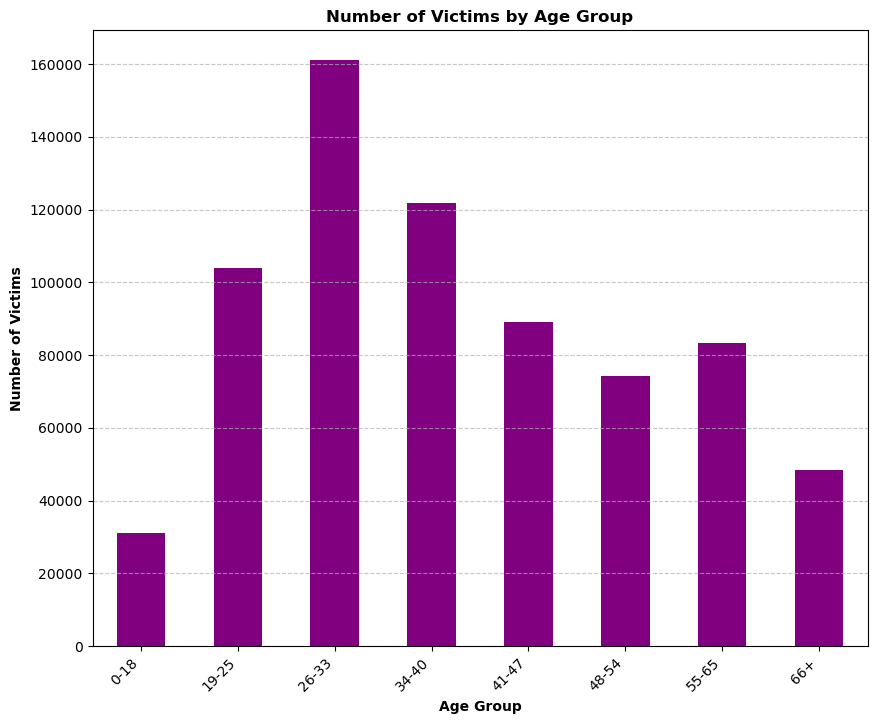

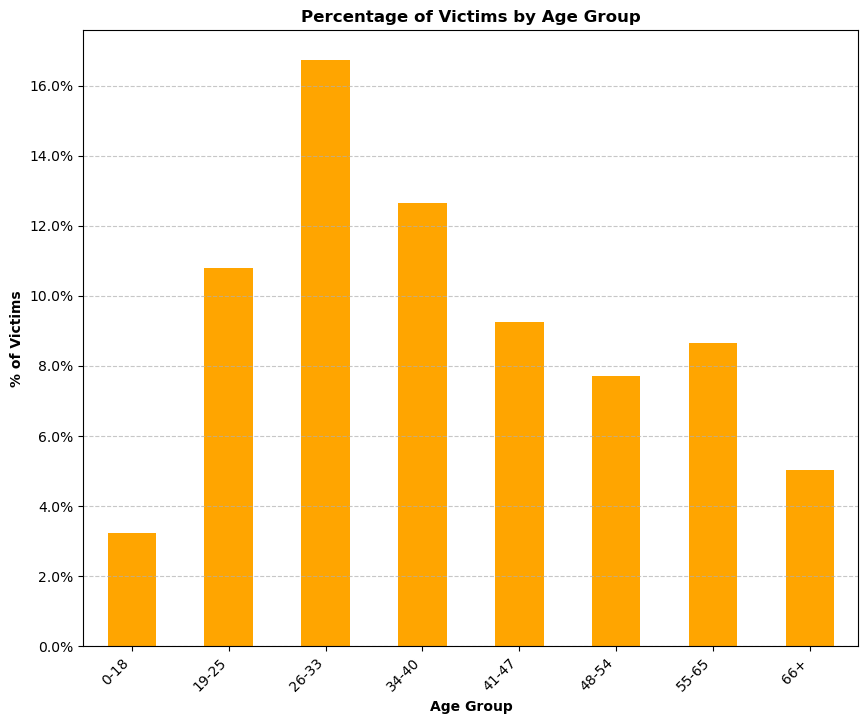

In [118]:
# Visualize the number of victims by age group
plt.figure(figsize=(10, 8))
age_group_summary['Number of Victims'].plot(kind='bar', color='purple')
plt.title('Number of Victims by Age Group', fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Number of Victims', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize the percentage of victims by age group
plt.figure(figsize=(10, 8))
age_group_summary['% of Victims'].plot(kind='bar', color='orange')
plt.title('Percentage of Victims by Age Group', fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('% of Victims', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.show()



In [108]:
# Number of victims by gender
gender_victim = la_crime_data_demo.groupby('Vict Sex')['DR_NO'].nunique()

# Percentage of victims by gender
gender_percentage = round((gender_victim / total_crimes) * 100, 2)

# gender summary DataFrame
gender_summary = pd.DataFrame({
    "Number of Victims":gender_victim,
    "% of Victims":gender_percentage
})
gender_summary

,Number of Victims,% of Victims
Vict Sex,,
F,348487,36.19
M,391192,40.62
X,223327,23.19


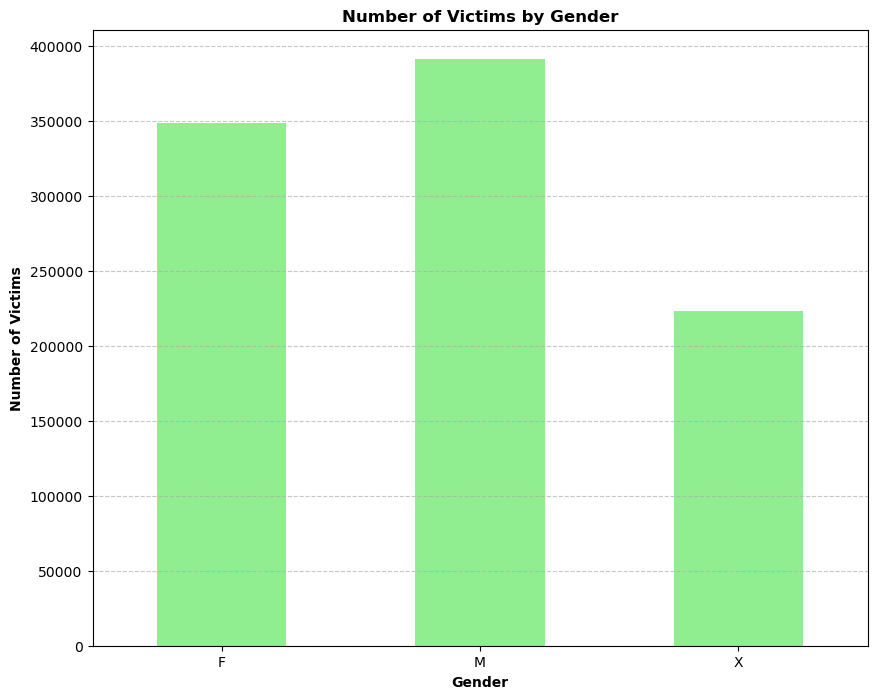

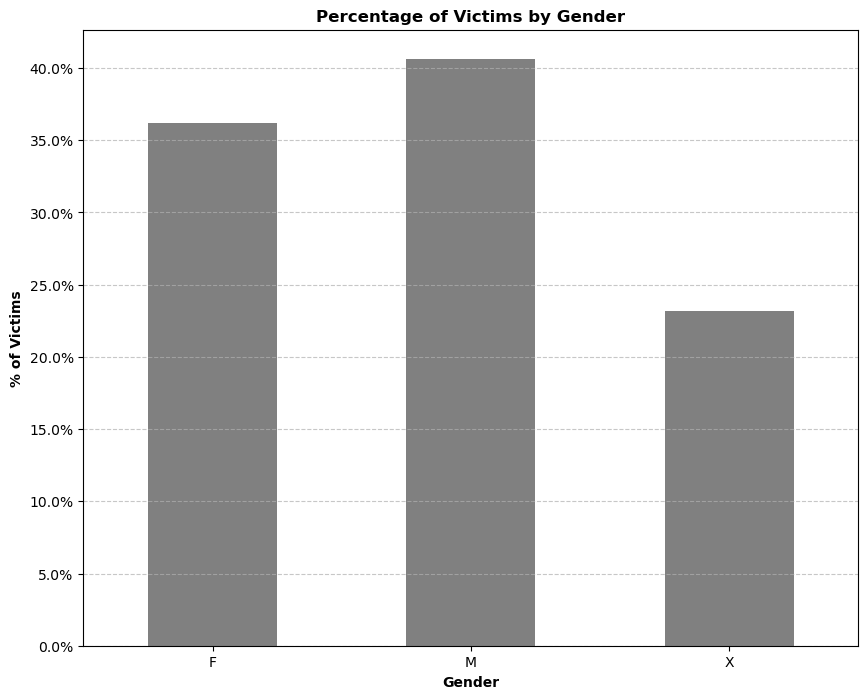

In [119]:
# Visualize the victim count by gender
plt.figure(figsize=(10, 8))
gender_summary['Number of Victims'].plot(kind='bar', color='lightgreen')
plt.title('Number of Victims by Gender', fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Number of Victims', fontweight='bold')
plt.xticks(rotation=0,fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize the percentage of victims by gender
plt.figure(figsize=(10, 8))
gender_summary['% of Victims'].plot(kind='bar', color='gray')
plt.title('Percentage of Victims by Gender', fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('% of Victims', fontweight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.show()

In [120]:
# Crime count by descent
descent_victim = la_crime_data_demo.groupby('Vict Descent')['DR_NO'].nunique()

# Percentage of victims by descent
descent_percentage = round((descent_victim / total_crimes) * 100, 2)    

# Create a summary DataFrame for descent
descent_summary = pd.DataFrame({
    'Number of Victims': descent_victim,
    '% of Victims': descent_percentage
})
descent_summary

,Number of Victims,% of Victims
Vict Descent,,
A,20828,2.16
B,132945,13.81
C,4039,0.42
D,84,0.01
F,4338,0.45
G,69,0.01
H,289523,30.06
I,936,0.10
J,1417,0.15


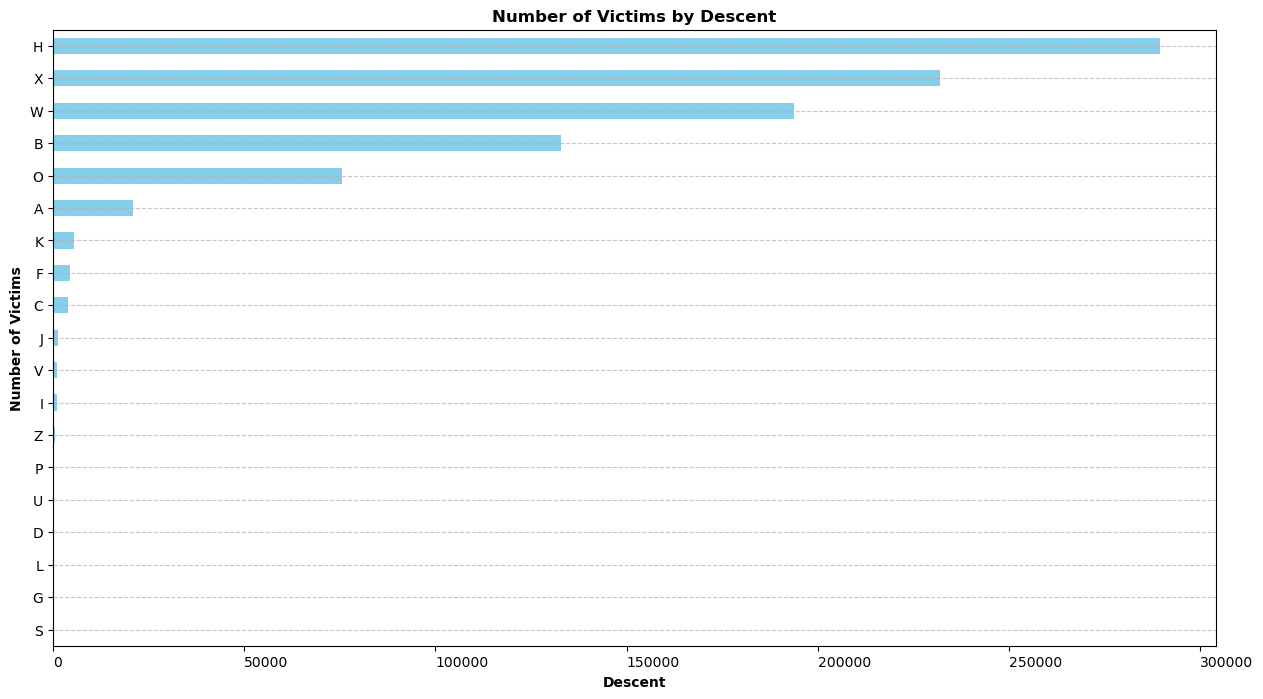

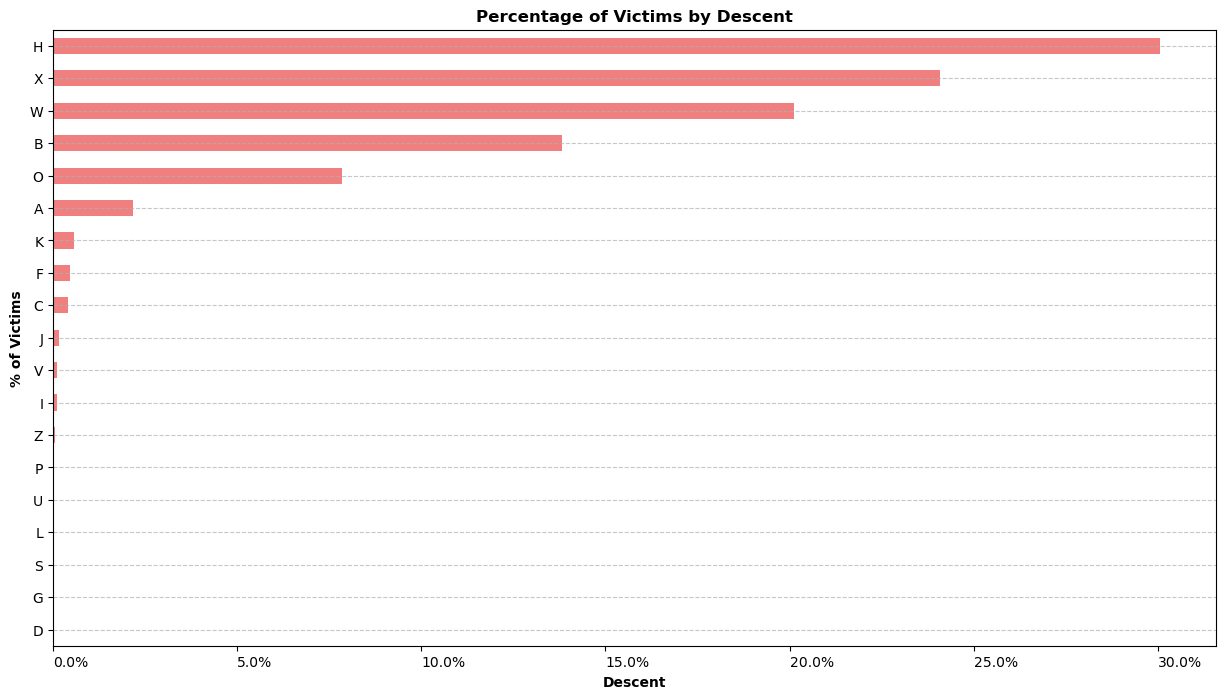

In [121]:
# Visualize the number of victims by descent
plt.figure(figsize=(15, 8))
descent_summary['Number of Victims'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Number of Victims by Descent', fontweight='bold')
plt.xlabel('Descent', fontweight='bold')
plt.ylabel('Number of Victims', fontweight='bold')
plt.xticks(rotation=0, ha='left', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize the percentage of victims by descent
plt.figure(figsize=(15, 8))
descent_summary['% of Victims'].sort_values().plot(kind='barh', color='lightcoral')
plt.title('Percentage of Victims by Descent', fontweight='bold')
plt.xlabel('Descent', fontweight='bold')
plt.ylabel('% of Victims', fontweight='bold')
plt.xticks(rotation=0, ha='left', fontsize=10)
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.show()

# Temporal Patterns Beyond Month/Hour
* Hourly Analysis: Group crimes by hours, calculate average crime count 
* Day-of-Week Analysis: Group crimes by day of the week (Monday–Sunday) to identify patterns. Calculate average crime counts per day, create a summary dataframe and visualize.
* Seasonal Trends: Group data by season (e.g., Winter: Dec–Feb, Spring: Mar–May, etc.) to compare crime average crime counts among seasons.
* Holiday Spikes: Compare crime count on holidays vs. non-holidays.



In [129]:
# Hourly Analysis
# Group crimes by hours and calculate average crime count
hourly_crime_count = la_crime_data.groupby(la_crime_data['TIME OCC'].dt.hour)['DR_NO'].nunique()

# Create a summary DataFrame for hourly crime count
hourly_summary = pd.DataFrame({
    'Average Crime Count': hourly_crime_count
})
# Format the index to show hours in 'HH:00 AM/PM' format
hourly_summary.index = pd.to_datetime(hourly_summary.index, format='%H').strftime('%H:00 %p')
hourly_summary.index.name = 'Hour of Day'
hourly_summary


,Average Crime Count
Hour of Day,
00:00 AM,39130
01:00 AM,28735
02:00 AM,24353
03:00 AM,21415
04:00 AM,18133
05:00 AM,16671
06:00 AM,22025
07:00 AM,24966
08:00 AM,35623


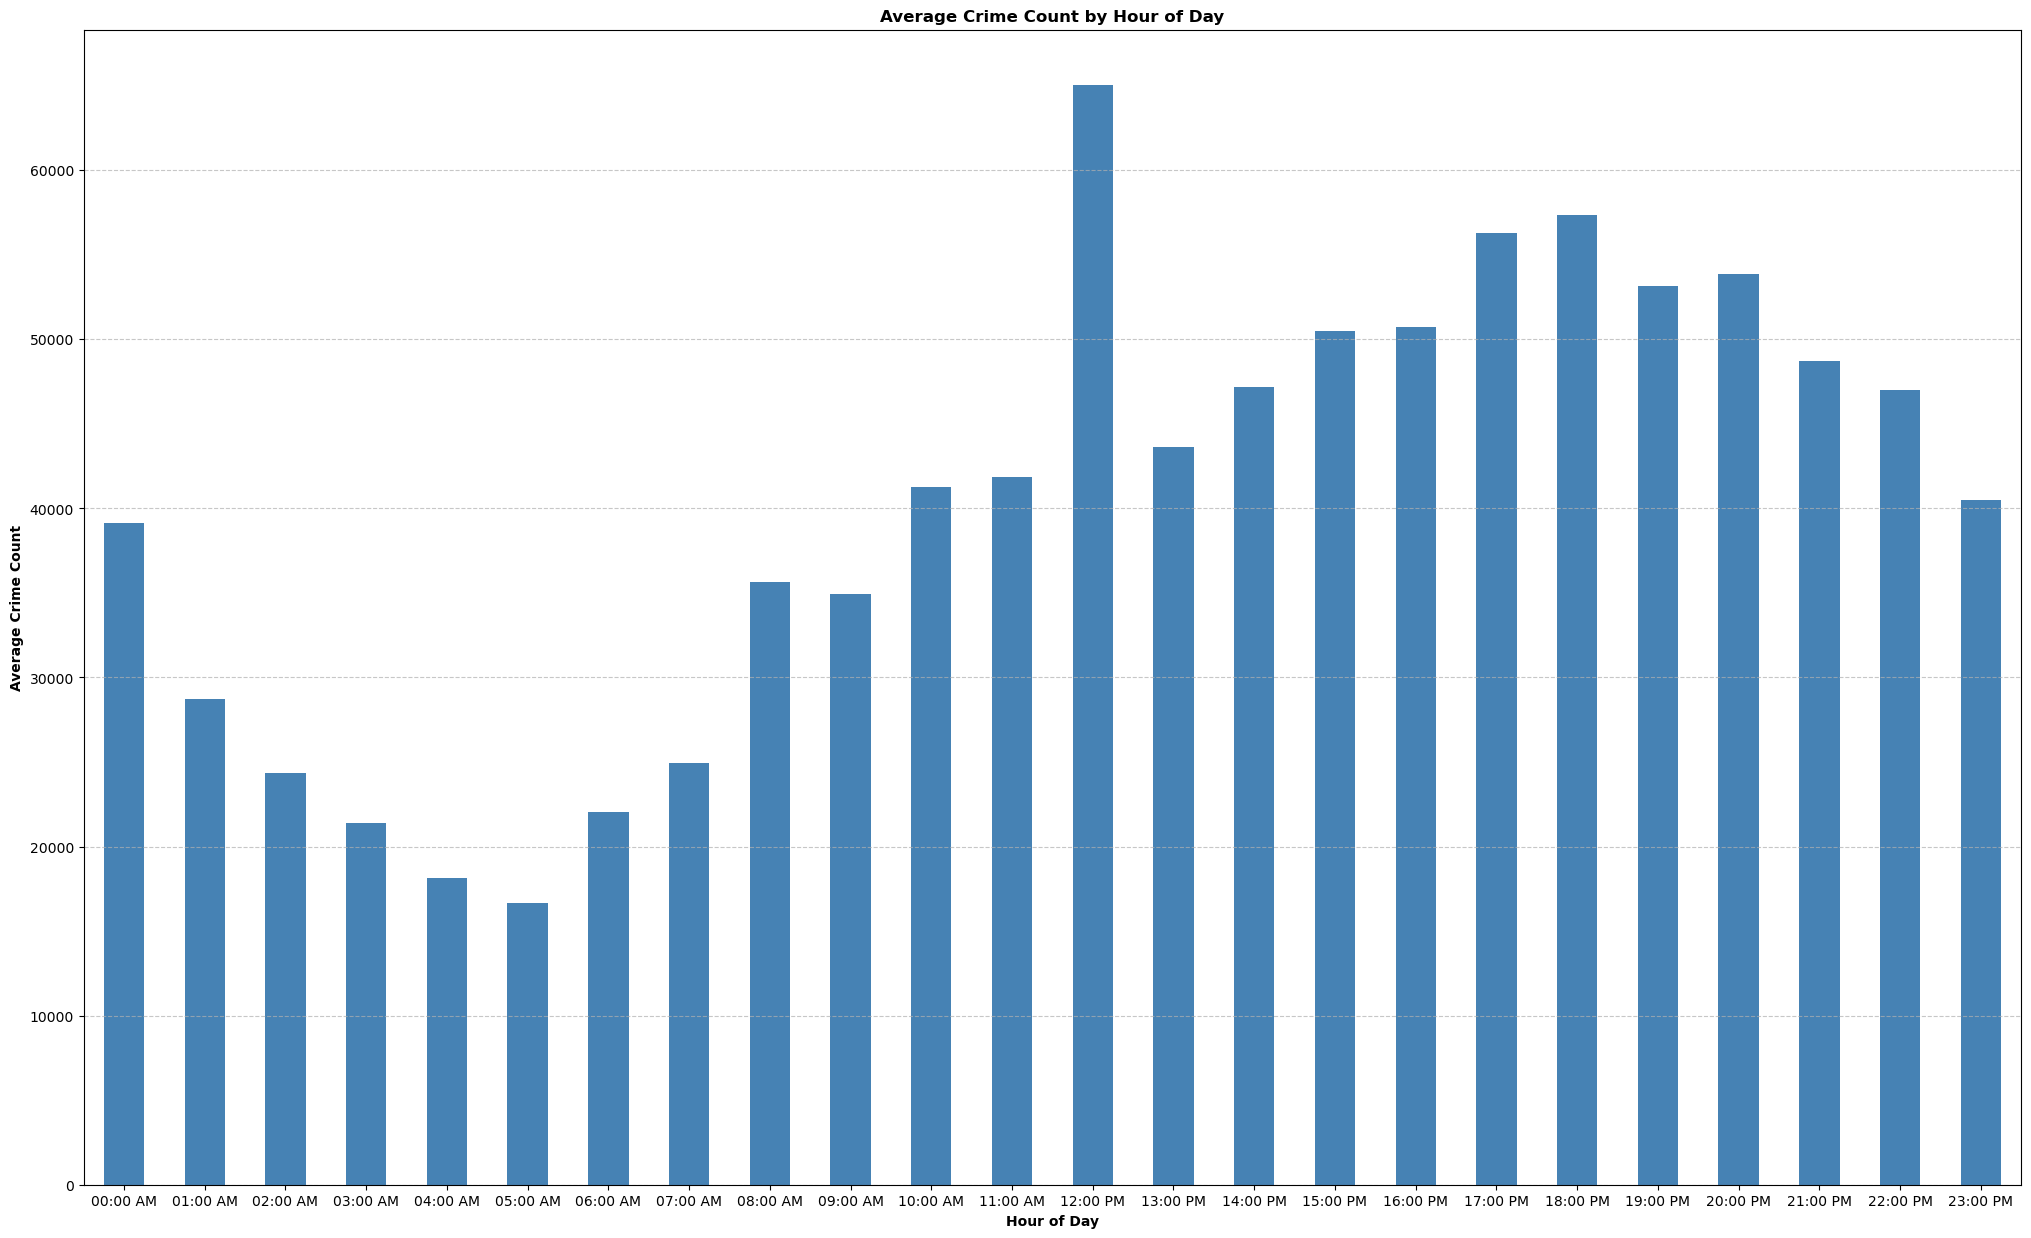

In [130]:
# Visualize the average crime count by hour
plt.figure(figsize=(25, 15))
hourly_summary['Average Crime Count'].plot(kind='bar', color='steelblue')
plt.title('Average Crime Count by Hour of Day', fontweight='bold')
plt.xlabel('Hour of Day', fontweight='bold')
plt.ylabel('Average Crime Count', fontweight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [131]:
# Day of the week analysis
la_crime_data_demo['Day of Week'] = la_crime_data_demo['DATE OCC'].dt.day_name()

# Group crimes by day of the week
day_of_week_crime = la_crime_data_demo.groupby('Day of Week')['DR_NO'].nunique()

# Get number of weeks in the dataset
num_weeks = la_crime_data_demo['DATE OCC'].dt.to_period('W').nunique()

# Calculate average crimes per day of the week
day_of_week_average = round(day_of_week_crime / num_weeks, 2)

# Create a summary DataFrame for day of the week
day_of_week_summary = pd.DataFrame({
    'Number of Crimes': day_of_week_crime,
    'Average Crime Count': day_of_week_average
})

# Sort the summary DataFrame by day of the week
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_summary = day_of_week_summary.reindex(day_of_week_order)
day_of_week_summary

,Number of Crimes,Average Crime Count
Day of Week,,
Monday,135901,568.62
Tuesday,132191,553.10
Wednesday,136857,572.62
Thursday,135749,567.99
Friday,147188,615.85
Saturday,141182,590.72
Sunday,133938,560.41


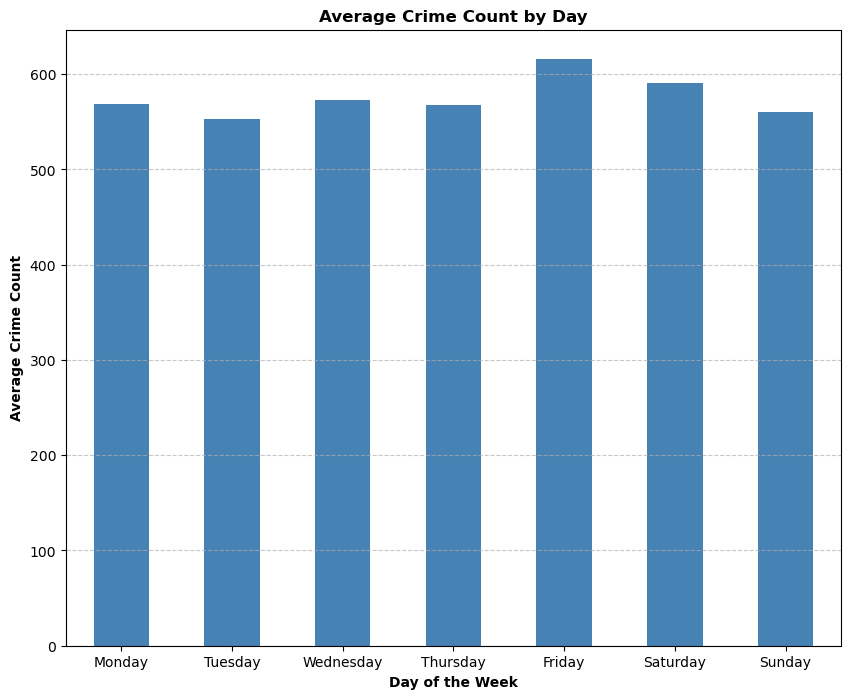

In [132]:
# Visualize the average crime count by day
plt.figure(figsize=(10, 8))
day_of_week_summary['Average Crime Count'].plot(kind='bar', color='steelblue')  
plt.title('Average Crime Count by Day', fontweight='bold')
plt.xlabel('Day of the Week', fontweight='bold')
plt.ylabel('Average Crime Count', fontweight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [133]:
# Seasonal trends
def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
# Create a new column for season and year
la_crime_data_demo['Season'] = la_crime_data_demo['DATE OCC'].dt.month.apply(season)
la_crime_data_demo['Year'] = la_crime_data_demo['DATE OCC'].dt.year

# Group crimes by season
season_crime = la_crime_data_demo.groupby(['Year','Season'])['DR_NO'].nunique()

# Calculate average crimes per season
season_crime_average = round(season_crime.groupby('Season').mean(), 2)

# Create a summary DataFrame for season
season_summary = pd.DataFrame({
    'Number of Crimes': season_crime.groupby('Season').sum(),
    'Average Crime Count': season_crime_average
})

# Reorder the seasons
season_summary = season_summary.reindex(['Winter', 'Spring', 'Summer', 'Fall'])
season_summary

,Number of Crimes,Average Crime Count
Season,,
Winter,252118,50423.6
Spring,253675,50735.0
Summer,236635,47327.0
Fall,220578,55144.5


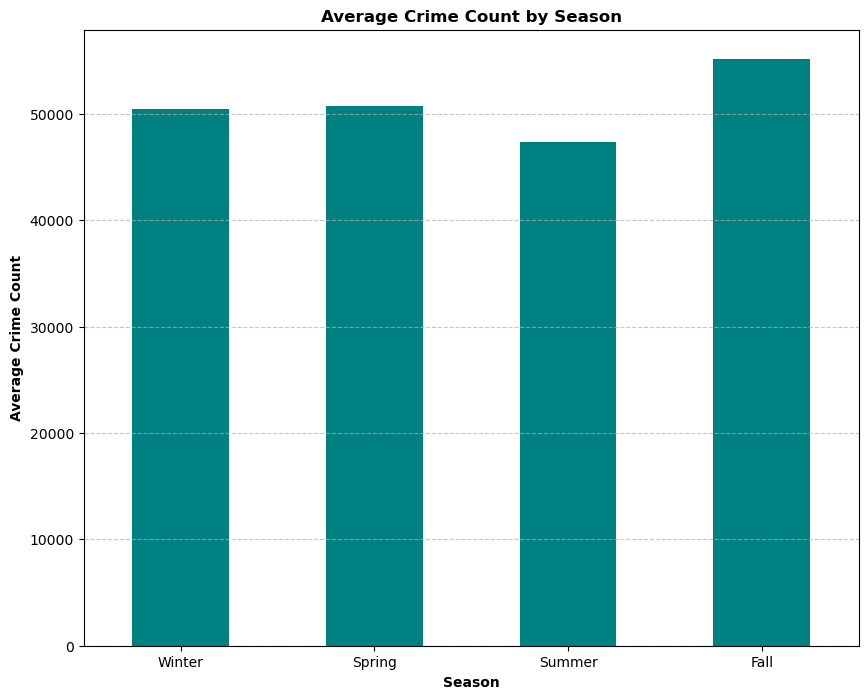

In [135]:
# Visualize the seasonal crime trends
plt.figure(figsize=(10, 8))
season_summary['Average Crime Count'].plot(kind='bar', color='teal')
plt.title('Average Crime Count by Season', fontweight='bold')
plt.xlabel('Season', fontweight='bold')
plt.ylabel('Average Crime Count', fontweight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [136]:
# Holiday spikes
import holidays
# Create a list of US holidays
us_holidays = holidays.US(years=la_crime_data_demo['DATE OCC'].dt.year.unique().tolist())

# Create a new column for holiday
la_crime_data_demo['Holiday'] = la_crime_data_demo['DATE OCC'].dt.date.apply(lambda x: x in us_holidays)

# Group crimes by holiday status
holiday_crime = la_crime_data_demo.groupby('Holiday')['DR_NO'].nunique().rename(index={True: 'Holiday', False: 'Non-Holiday'})

# Average daily crime count on holidays and non-holidays
daily_crime_count = la_crime_data_demo.groupby(['DATE OCC', 'Holiday'])['DR_NO'].nunique().reset_index()
holiday_daily_average = daily_crime_count[daily_crime_count['Holiday'] == True]['DR_NO'].mean()
non_holiday_daily_average = daily_crime_count[daily_crime_count['Holiday'] == False]['DR_NO'].mean()

# Create a summary DataFrame for holiday crime
holiday_summary = pd.DataFrame({
    'Number of Crimes': holiday_crime,
    'Average Daily Crime Count': [holiday_daily_average, non_holiday_daily_average]
}, index=['Holiday', 'Non-Holiday'])

holiday_summary

,Number of Crimes,Average Daily Crime Count
Holiday,34974,603.000000
Non-Holiday,928032,577.493466


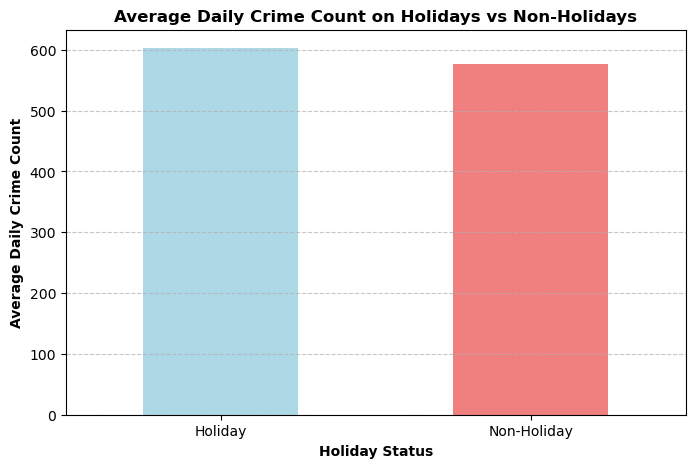

In [137]:
# Visualize the average daily crime count on holidays and non-holidays
plt.figure(figsize=(8, 5))  
holiday_summary['Average Daily Crime Count'].plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Average Daily Crime Count on Holidays vs Non-Holidays', fontweight='bold')
plt.xlabel('Holiday Status', fontweight='bold')
plt.ylabel('Average Daily Crime Count', fontweight='bold')
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()